# Telco Customer Churn Analysis

In this Jupyter Notebook, we will analyze a preprocessed dataset containing information about customer churn in a telecommunications company. We will use various data visualization techniques to explore the dataset and gain insights about the factors that contribute to customer churn. We will then apply machine learning techniques to build a model that can predict whether a customer is likely to churn or not.

## Data Loading and Preprocessing

We first load the preprocessed dataset and apply label encoding to the non-numeric categorical columns to make them compatible with machine learning algorithms.

## Data Visualization

We visualize the correlation matrix to understand the relationships between different features in the dataset. We also visualize the distribution of numerical and categorical features to gain insights into their importance and contribution to customer churn.

## Model Building

We split the data into training and testing sets and address class imbalance using SMOTE. We then select the Random Forest Classifier algorithm to build a model that can predict customer churn. We perform cross-validation with StratifiedKFold to evaluate the performance of the classifier. We then perform hyperparameter tuning using GridSearchCV to find the best combination of hyperparameters for the classifier on the oversampled training data. We train the model using the optimized hyperparameters and display the feature importances to understand the relative importance of each feature in making predictions.

## Conclusion

In this notebook, we have demonstrated the use of various data visualization techniques and machine learning algorithms to analyze a dataset and build a predictive model. We have shown how to identify important features that contribute to customer churn and how to optimize machine learning algorithms to make accurate predictions.


#  ***In the second phase of the machine learning project, focusing on model training:***

1. Load the preprocessed dataset: Start by loading the preprocessed dataset you created in the first phase of the project.
2. Encode categorical variables: Transform categorical variables into numerical values using one-hot encoding, label encoding, or binary encoding, depending on the nature of the data.
3. Scale numerical variables: Standardize or normalize the numerical variables to ensure that all features have the same scale and that no single feature dominates the model.
4. Split the data: Divide the dataset into a training set and a test set, typically using a 70-30 or 80-20 split. This will allow you to train the model on one subset of the data and evaluate its performance on another, unseen subset.
5. Select a machine learning algorithm: Choose an appropriate machine learning algorithm for the task, taking into account the nature of the data and the problem you are trying to solve. In the given project, a RandomForestClassifier is used.
6. Perform cross-validation: Use cross-validation to evaluate the performance of the chosen algorithm. This will help you understand how well the model is likely to generalize to new, unseen data.
7. Hyperparameter tuning: Optimize the hyperparameters of the chosen algorithm using techniques such as Grid Search or Randomized Search. This step will help you find the best combination of hyperparameters for your model.
8. Train the model: Train the model using the optimized hyperparameters on the training dataset.


# **Importing necessary Libraries**

- **pandas**: A popular library used for data manipulation and analysis. It provides data structures like DataFrames for handling tabular data.
- **numpy**: A library for working with arrays, matrices, and mathematical operations. It's often used in combination with pandas for data manipulation.
- **matplotlib.pyplot**: A plotting library that provides a MATLAB-like interface for creating various types of plots and visualizations.
- **seaborn**: A statistical data visualization library based on matplotlib, designed to work well with pandas DataFrames. It provides more visually appealing plots and additional functionality over matplotlib.
- `train_test_split`, `StratifiedKFold`, and `GridSearchCV`: Functions from `sklearn.model_selection` module for splitting datasets into training and testing sets, performing stratified k-fold cross-validation, and searching for the best hyperparameters using grid search, respectively.
- `RandomForestClassifier`: A machine learning model from the `sklearn.ensemble` module that implements a random forest classifier, an ensemble learning method for classification tasks.
- `SMOTE`: A class from the `imblearn.over_sampling` module that provides an implementation of the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in datasets.
- `cross_val_score`: A function from `sklearn.model_selection` module to evaluate a machine learning model using cross-validation.
- `LabelEncoder`: A class from the `sklearn.preprocessing` module that provides functionality to encode categorical variables as integers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

This code snippet reads the preprocessed dataset from a CSV file and stores it in a pandas DataFrame.

- `preprocessed_file_path`: A string containing the file path of the preprocessed dataset, named `preprocessed_telco_customer_churn.csv`.
- `pd.read_csv(preprocessed_file_path)`: The `read_csv()` function from the pandas library is used to read the CSV file from the specified file path. It returns a DataFrame containing the dataset.
- `preprocessed_df`: The DataFrame variable where the data from the CSV file is stored. This DataFrame will be used throughout the project for further analysis, visualization, and model training.

By loading the preprocessed dataset into a DataFrame, you can take advantage of pandas' powerful data manipulation and analysis capabilities to work with the data efficiently.


In [3]:
# Load the preprocessed dataset
preprocessed_file_path = 'preprocessed_telco_customer_churn.csv'
preprocessed_df = pd.read_csv(preprocessed_file_path)

This code snippet identifies non-numeric categorical columns in the `preprocessed_df` DataFrame.

- `preprocessed_df.select_dtypes(include=['object'])`: The `select_dtypes()` function from the pandas library is used to select columns with specific data types. In this case, it selects columns with the data type `'object'`, which usually represent non-numeric categorical columns (e.g., strings).
- `columns.tolist()`: This method is called on the filtered DataFrame to extract the column names and convert them into a list.
- `categorical_columns`: The variable that stores the list of non-numeric categorical column names.

By identifying the non-numeric categorical columns, you can perform further preprocessing on these columns, such as label encoding or one-hot encoding, to convert them into a suitable format for machine learning algorithms.


In [4]:
# Identify non-numeric categorical columns
categorical_columns = preprocessed_df.select_dtypes(
    include=['object']).columns.tolist()

This code snippet applies label encoding to the non-numeric categorical columns in the `preprocessed_df` DataFrame.

- `label_encoder = LabelEncoder()`: The `LabelEncoder` class from the sklearn.preprocessing library is instantiated. This encoder will be used to convert non-numeric categorical data into numeric values.
- `for col in categorical_columns:`: This is a for loop that iterates over the `categorical_columns` list.
- `label_encoder.fit_transform(preprocessed_df[col])`: Inside the loop, the `fit_transform()` method of the `LabelEncoder` object is called. This method learns the unique values in the specified column and assigns a numeric value to each unique value. The transformed column is then returned with the categorical values replaced by their respective numeric values.
- `preprocessed_df[col] =`: The transformed column is assigned back to the original DataFrame, effectively replacing the non-numeric categorical column with its encoded numeric version.

Applying label encoding to non-numeric categorical columns is essential for most machine learning algorithms because they require numerical inputs. It allows the algorithms to process and learn from the categorical data more effectively.


In [5]:
# Apply label encoding to non-numeric categorical columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    preprocessed_df[col] = label_encoder.fit_transform(preprocessed_df[col])

It visualizes the correlation matrix of the `preprocessed_df` DataFrame using a heatmap.

- `plt.figure(figsize=(20, 18))`: This line creates a new matplotlib figure with the specified dimensions (20 inches in width and 18 inches in height) to accommodate the heatmap.
- `sns.heatmap()`: The `heatmap()` function from the seaborn library is used to create a heatmap visualization.
- `preprocessed_df.corr()`: The `corr()` method of the DataFrame calculates the pairwise correlation between the columns. The resulting correlation matrix is passed as the first argument to the `heatmap()` function.
- `annot=True`: This parameter tells the `heatmap()` function to display the correlation coefficient values inside each cell of the heatmap.
- `cmap='coolwarm'`: This parameter sets the colormap to use for the heatmap. In this case, it's the 'coolwarm' colormap.
- `fmt='.2f'`: This parameter formats the annotations (correlation coefficients) to display two decimal places.
- `annot_kws={"size": 8}`: This parameter customizes the appearance of the annotations. Here, it sets the font size of the annotations to 8.
- `plt.title("Correlation Matrix")`: This line adds a title to the heatmap plot.
- `plt.show()`: This line displays the heatmap plot.

The heatmap helps visualize the relationships between different features in the dataset. It can help in identifying strong correlations between features, which may impact the performance of a machine learning model. In turn, this insight can be used for feature selection or engineering.


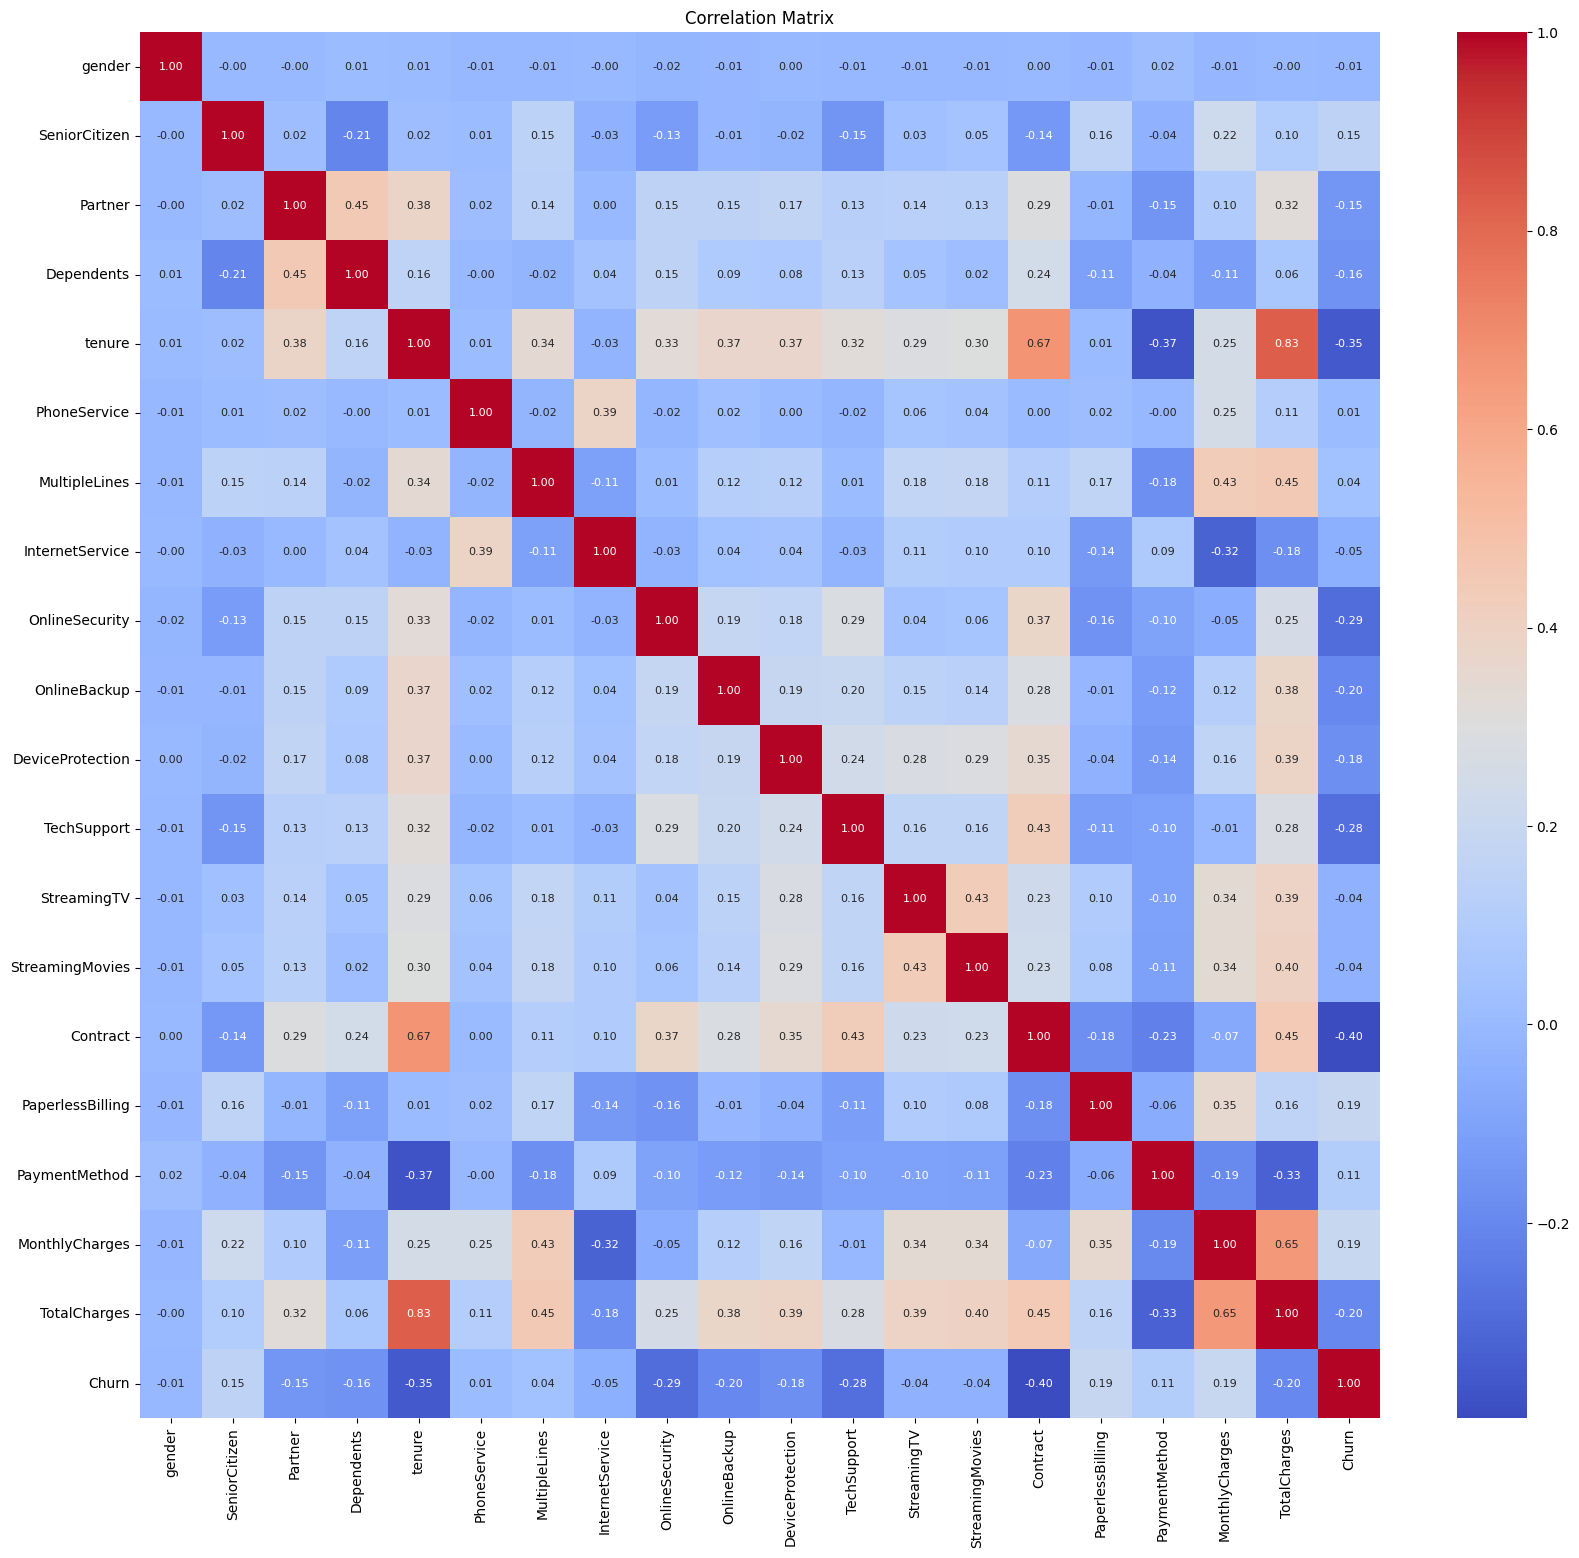

In [6]:
# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(preprocessed_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()


It visualizes the distribution of the numerical features in the `preprocessed_df` DataFrame using histograms.

- `numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']`: This line defines a list of the numerical features in the dataset that we want to visualize.
- `for feature in numerical_features:`: A for loop is used to iterate through each numerical feature in the list.
    - `plt.figure(figsize=(8, 6))`: This line creates a new matplotlib figure with the specified dimensions (8 inches in width and 6 inches in height) to accommodate the histogram plot.
    - `sns.histplot()`: The `histplot()` function from the seaborn library is used to create a histogram visualization.
    - `preprocessed_df[feature]`: This line selects the data of the current numerical feature from the DataFrame.
    - `kde=True`: This parameter tells the `histplot()` function to display a kernel density estimation (KDE) curve on top of the histogram. The KDE curve helps in visualizing the shape of the distribution more clearly.
    - `bins=30`: This parameter sets the number of bins used for the histogram. In this case, 30 bins are used.
    - `plt.title(f'Distribution of {feature}')`: This line adds a title to the histogram plot, indicating the feature being displayed.
    - `plt.show()`: This line displays the histogram plot.

Visualizing the distribution of numerical features is important to understand the shape, central tendency, and dispersion of the data. This information can help in identifying potential data issues, such as outliers or skewed distributions, and inform data preprocessing decisions, such as scaling or transformation.

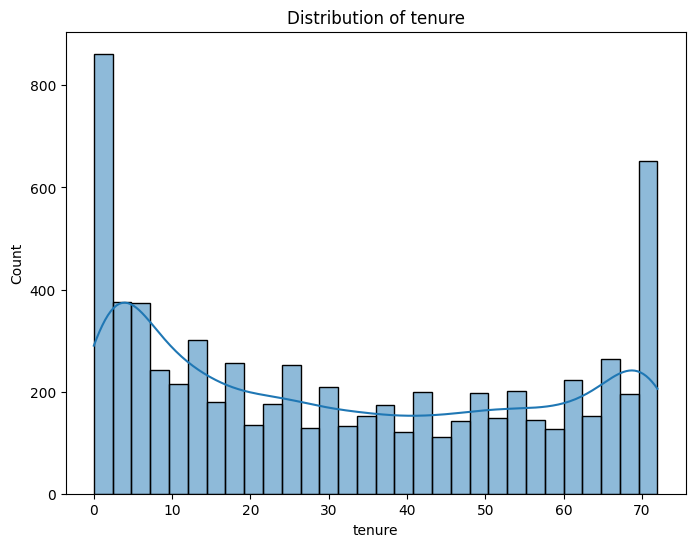

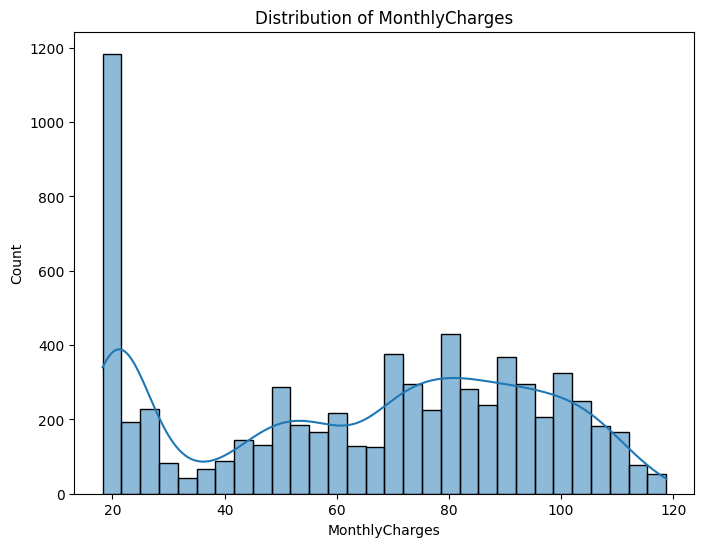

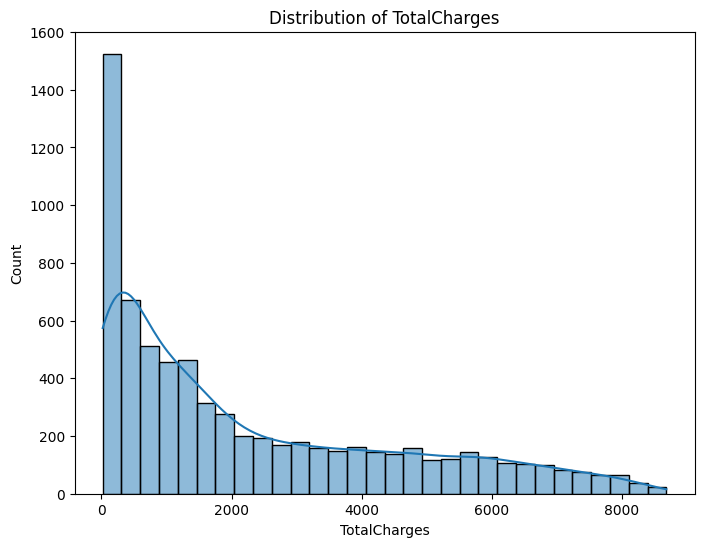

In [7]:
# Visualize the distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(preprocessed_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

This code snippet visualizes the distribution of categorical features in the `preprocessed_df` DataFrame, grouped by the Churn target variable.

- `categorical_features = [col for col in preprocessed_df.columns if col not in numerical_features + ['Churn']]`: This line creates a list of categorical feature names by selecting all columns in the DataFrame that are not numerical features or the target variable ('Churn').
- `for feature in categorical_features:`: A for loop is used to iterate through each categorical feature in the list.
    - `plt.figure(figsize=(8, 6))`: This line creates a new matplotlib figure with the specified dimensions (8 inches in width and 6 inches in height) to accommodate the count plot.
    - `sns.countplot()`: The countplot() function from the seaborn library is used to create a bar plot showing the counts of observations in each category.
    - `x=preprocessed_df[feature]`: This line selects the data of the current categorical feature from the DataFrame.
    - `hue=preprocessed_df['Churn']`: This parameter tells the countplot() function to group the data by the 'Churn' target variable, so that the distribution of each category can be compared across the two classes (churned and not churned).
    - `plt.title(f'Distribution of {feature} by Churn')`: This line adds a title to the count plot, indicating the feature being displayed and that it is grouped by 'Churn'.
    - `plt.xticks(rotation=45)`: This line rotates the x-axis tick labels by 45 degrees to make them more readable when they are long or closely spaced.
    - `plt.show()`: This line displays the count plot.

Visualizing the distribution of categorical features by the target variable can help identify relationships between the features and the target variable. It provides insights into how different feature categories may influence the target variable, which can be useful in feature engineering, selection, and model interpretation.


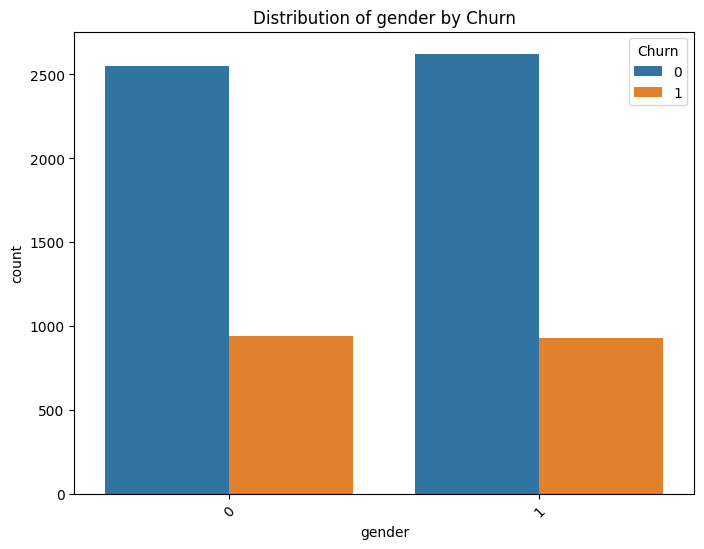

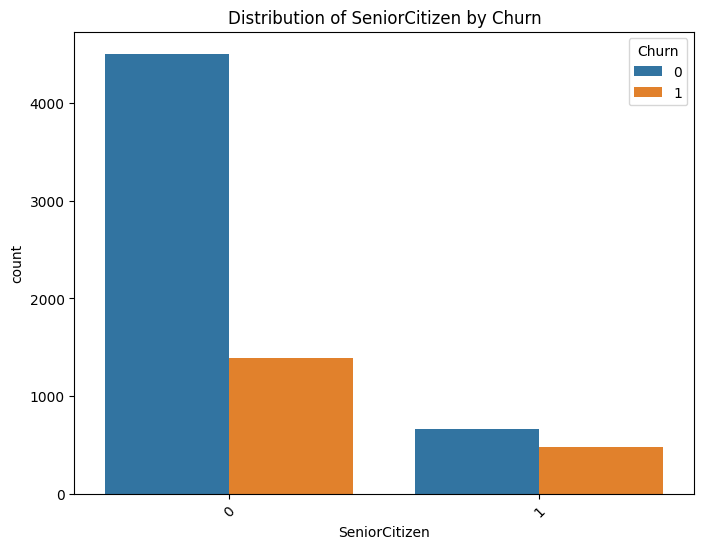

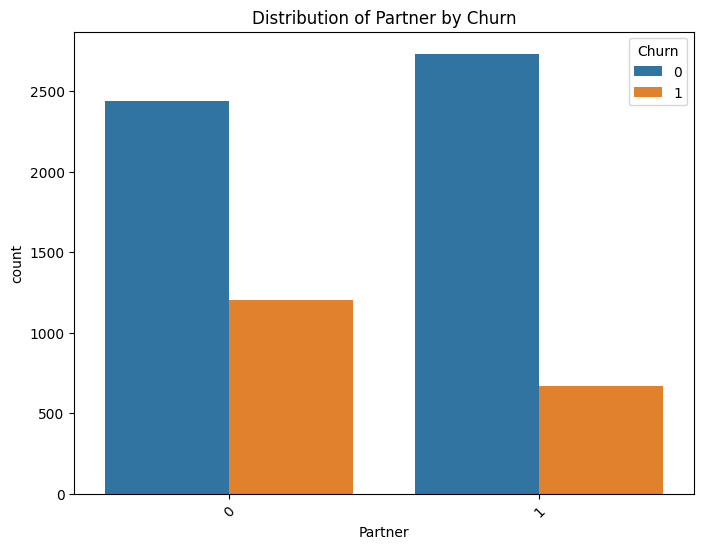

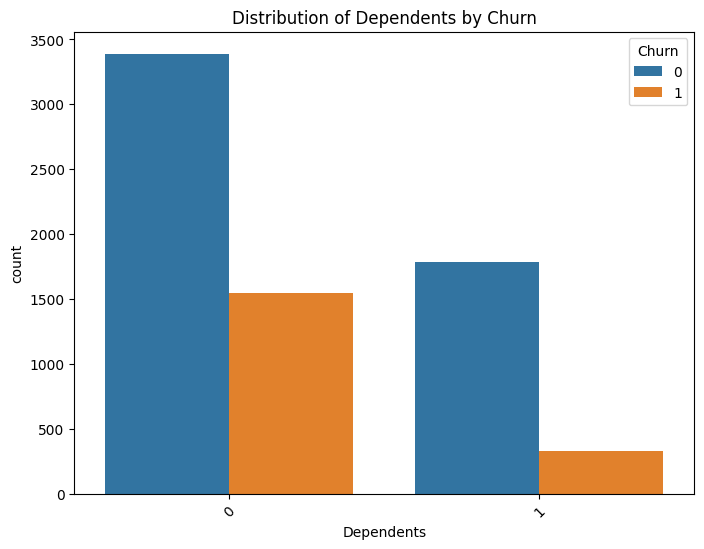

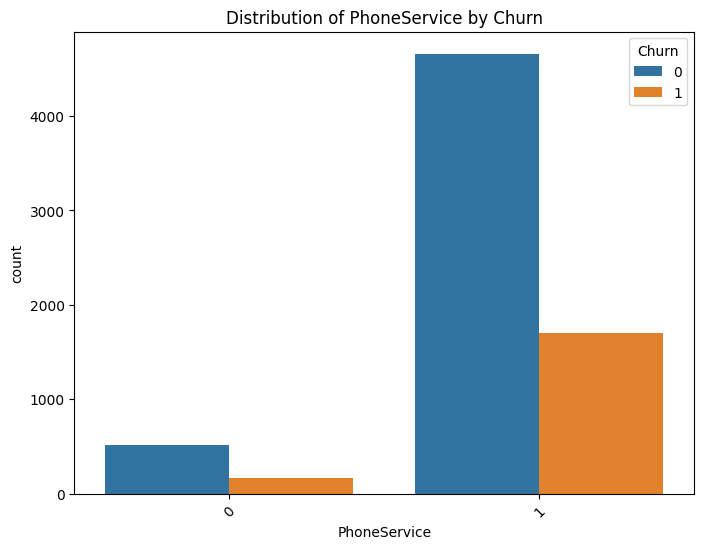

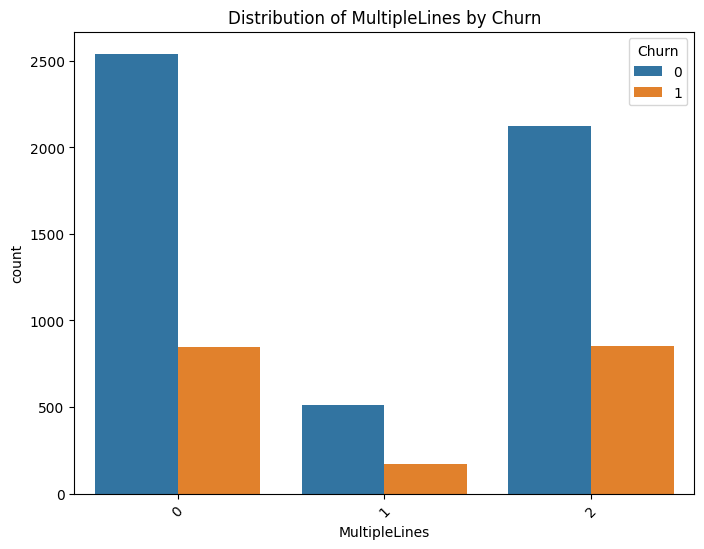

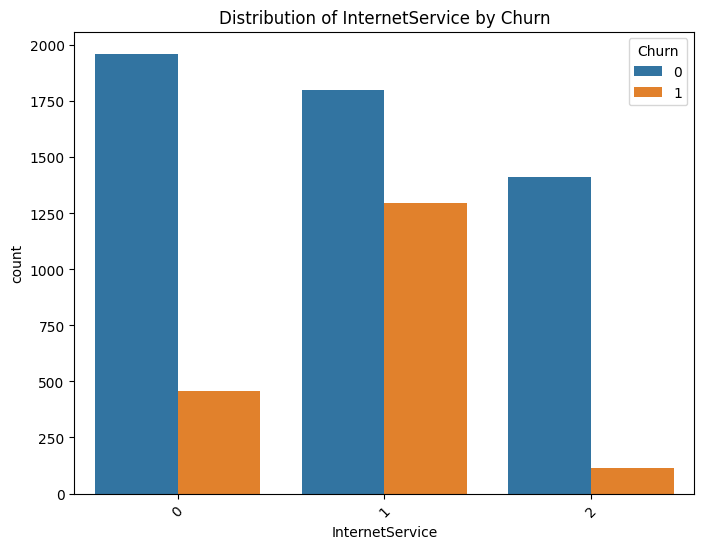

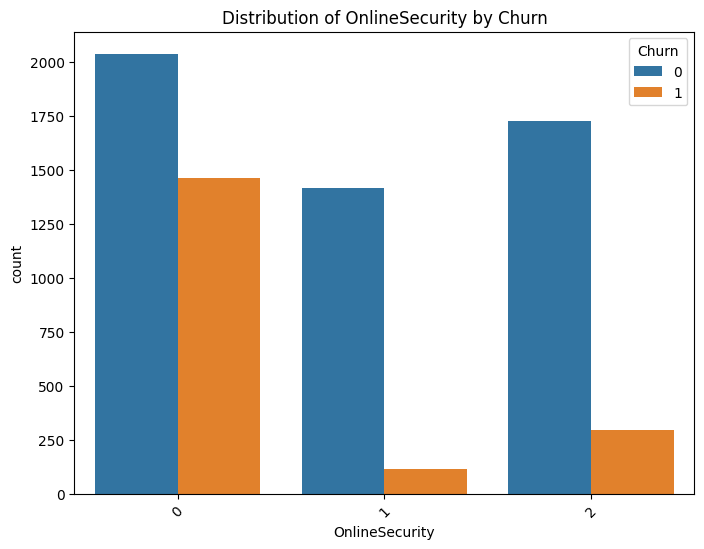

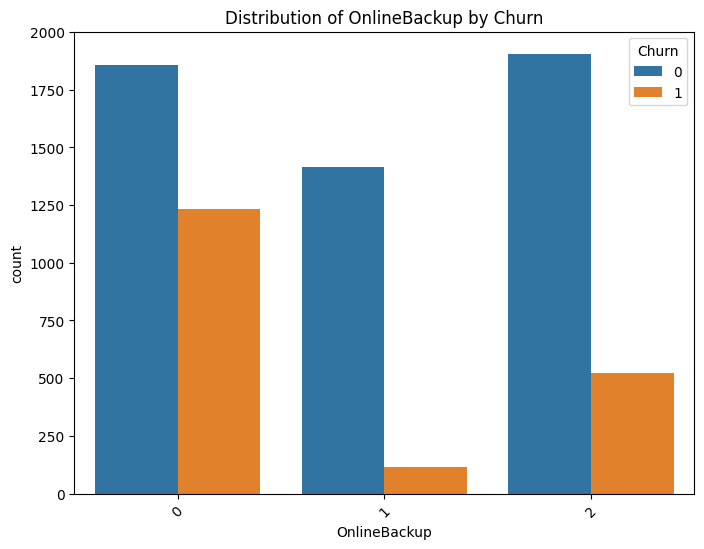

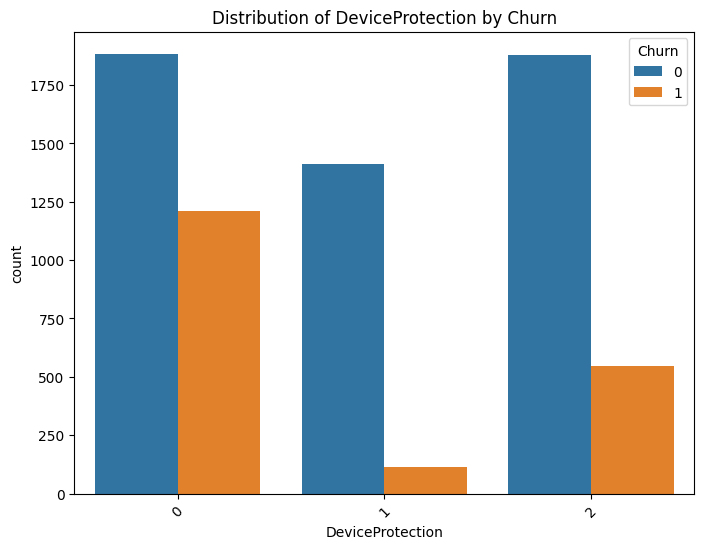

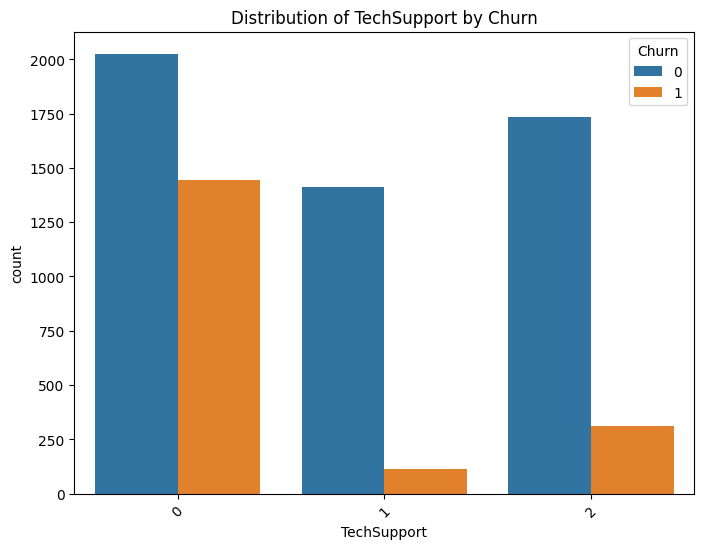

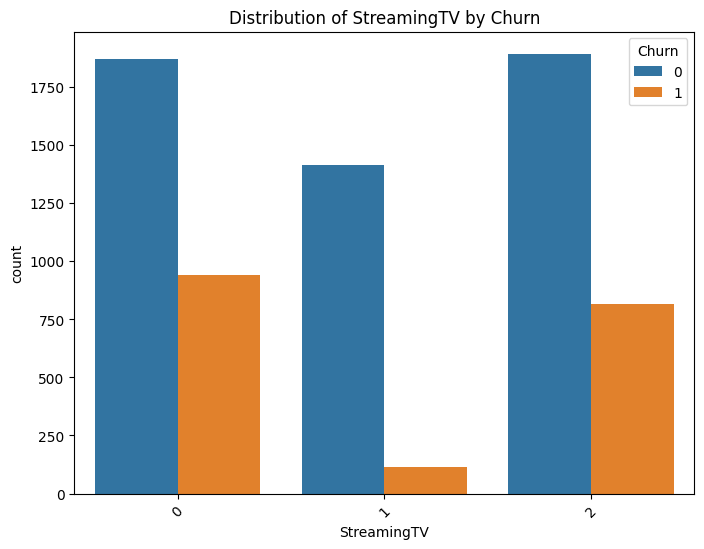

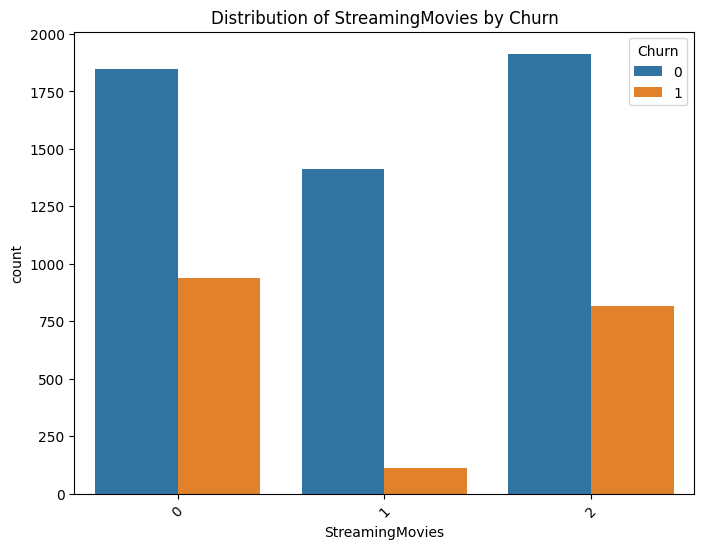

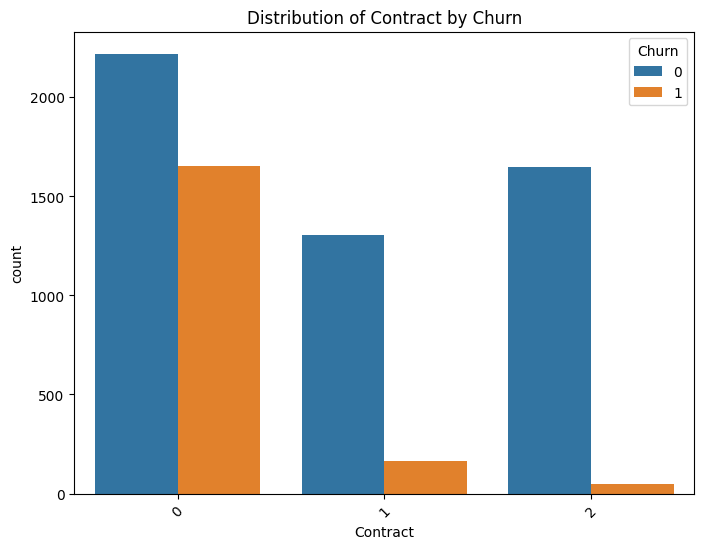

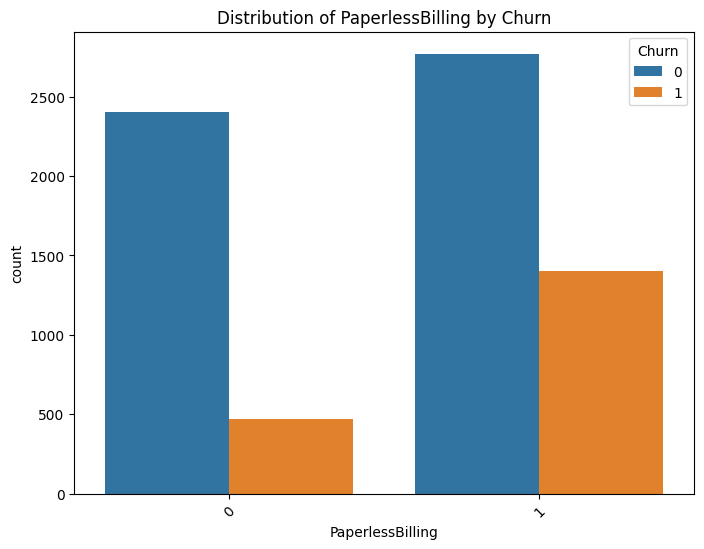

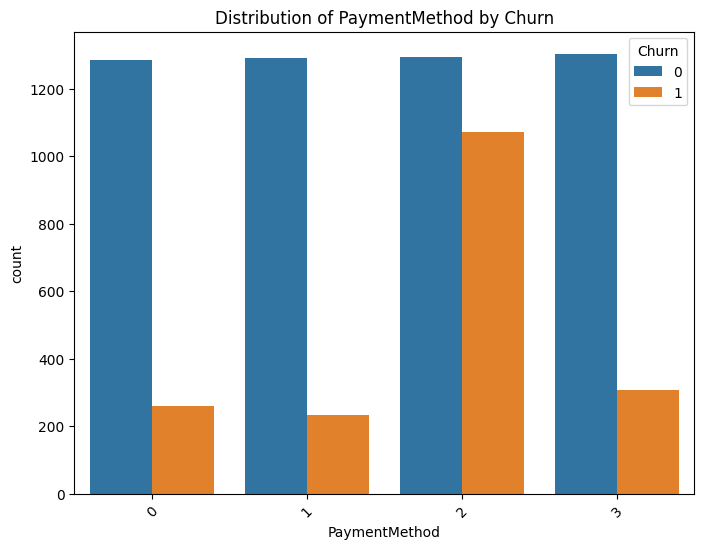

In [8]:
# Visualize the distribution of categorical features
categorical_features = [
    col for col in preprocessed_df.columns if col not in numerical_features + ['Churn']]

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=preprocessed_df[feature], hue=preprocessed_df['Churn'])
    plt.title(f'Distribution of {feature} by Churn')
    plt.xticks(rotation=45)
    plt.show()

This code snippet splits the preprocessed dataset into training and testing sets for both the features (X) and the target variable (y).

- `X = preprocessed_df.drop(['Churn'], axis=1)`: This line drops the target variable 'Churn' from the DataFrame, leaving only the features. The result is stored in a new variable named X.
- `y = preprocessed_df['Churn']`: This line selects the target variable 'Churn' from the DataFrame and stores it in a new variable named y.
- `train_test_split()`: The train_test_split() function from the sklearn.model_selection module is used to split the dataset into training and testing sets.
- `X, y`: These parameters are the feature matrix X and the target vector y that we want to split.
- `test_size=0.3`: This parameter specifies that 30% of the data should be used for the testing set, while the remaining 70% should be used for the training set.
- `random_state=42`: This parameter sets the random seed to a fixed number (42) to ensure the reproducibility of the results. If the random seed is not set, the data will be split differently each time the code is run, potentially leading to different results.
- `stratify=y`: This parameter tells the train_test_split() function to maintain the same class distribution in both the training and testing sets as in the original dataset. This is particularly useful when working with imbalanced datasets, as it ensures that both sets will have a similar proportion of positive and negative examples.

The result of this code snippet is the creation of four variables: `X_train`, `X_test`, `y_train`, and `y_test`, which store the training and testing data for both the features and the target variable. This split is essential for training and evaluating machine learning models, as it allows us to test the model's performance on unseen data, providing an estimate of its ability to generalize to new examples.


In [9]:
# Split the data
X = preprocessed_df.drop(['Churn'], axis=1)
y = preprocessed_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


This code snippet addresses the class imbalance problem in the dataset using the Synthetic Minority Over-sampling Technique (SMOTE).

`smote = SMOTE(random_state=42)` : This line creates an instance of the SMOTE class from the `imblearn.over_sampling` module with a random seed of 42 to ensure reproducibility.

`X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)` : This line calls the `fit_resample` method on the `smote` object, which takes the original training set (`X_train` and `y_train`) as input and generates a new, balanced training set (`X_train_smote` and `y_train_smote`). This new training set contains an equal number of examples from both the majority and minority classes.

SMOTE works by generating synthetic examples for the minority class, helping to balance the class distribution. It does so by selecting examples that are close in the feature space, drawing a line between these examples, and generating new samples along this line.

By addressing class imbalance, SMOTE helps improve the performance of machine learning algorithms, especially in cases where the minority class is of particular interest (such as customer churn prediction). This is because the algorithm will now have more examples of the minority class to learn from, making it less likely to be biased towards the majority class.


In [10]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

This code snippet selects a machine learning algorithm to be used for training and prediction. In this case, the chosen algorithm is the Random Forest Classifier.

To create an instance of the RandomForestClassifier class from the sklearn.ensemble module with a random seed of 42 to ensure reproducibility, use the following line of code:

clf = RandomForestClassifier(random_state=42)


The `clf` variable is assigned to this instance. The Random Forest Classifier is an ensemble learning method that works by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It can handle both classification and regression tasks.

The advantage of using a Random Forest Classifier is that it generally performs well on a wide range of problems, often without the need for extensive hyperparameter tuning. It can handle high-dimensional datasets, is less prone to overfitting compared to single decision trees, and can easily manage both numerical and categorical features.


In [11]:
# Select a machine learning algorithm
clf = RandomForestClassifier(random_state=42)

This code snippet uses cross-validation with StratifiedKFold to evaluate the performance of the `RandomForestClassifier` (`clf`) on the oversampled training data (`X_train_smote`, `y_train_smote`):

- `cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`: This line creates an instance of the `StratifiedKFold` class from the `sklearn.model_selection` module with 5 splits (folds), shuffling enabled, and a random seed of 42 for reproducibility. The `cv` variable is assigned to this instance. `StratifiedKFold` ensures that each fold has approximately the same proportion of each target class as the complete dataset, which helps to maintain a balanced representation of the classes in each fold.

- `cv_scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')`: This line uses the `cross_val_score` function from the `sklearn.model_selection` module to calculate the cross-validation scores for the `RandomForestClassifier` (`clf`). The scores are based on the oversampled training data (`X_train_smote`, `y_train_smote`), the `StratifiedKFold` cross-validator (`cv`), and the scoring metric (`'accuracy'`). The `cv_scores` variable is assigned the resulting scores for each fold.

The next two lines of code print the individual cross-validation scores for each fold and the mean cross-validation score, which is the average of all the scores. These values provide an estimate of the classifier's performance and can help determine if further tuning or adjustments are needed:

- `print("Cross-validation scores:", cv_scores)`: This line prints the individual cross-validation scores for each fold.
- `print("Mean cross-validation score:", np.mean(cv_scores))`: This line prints the mean cross-validation score, which is the average of all the scores. 

These values provide an estimate of the classifier's performance and can help determine if further tuning or adjustments are needed.


In [12]:
# Perform cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.85990338 0.84955141 0.84541063 0.84955141 0.84392265]
Mean cross-validation score: 0.8496678982266299


This code snippet performs hyperparameter tuning using GridSearchCV to find the best combination of hyperparameters for the `RandomForestClassifier` (`clf`) on the oversampled training data (`X_train_smote`, `y_train_smote`):

- `param_grid`: This dictionary defines the search space for the hyperparameters. It contains four keys: 'n_estimators', 'max_depth', 'min_samples_split', and 'min_samples_leaf', each representing a hyperparameter for the `RandomForestClassifier`. The values associated with these keys are lists of possible hyperparameter values that `GridSearchCV` will explore.

- `grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)`: This line creates an instance of the `GridSearchCV` class from the `sklearn.model_selection` module. It takes the following arguments:
  - `estimator=clf`: The `RandomForestClassifier`.
  - `param_grid=param_grid`: The search space defined earlier.
  - `scoring='accuracy'`: The performance metric used to evaluate the classifier.
  - `cv=cv`: The cross-validator, which is the `StratifiedKFold` instance created earlier.
  - `n_jobs=-1`: The number of parallel jobs to run. Setting it to -1 means using all available processors.
  
- `grid_search.fit(X_train_smote, y_train_smote)`: This line fits the `GridSearchCV` instance to the oversampled training data (`X_train_smote`, `y_train_smote`). `GridSearchCV` will explore all possible combinations of hyperparameter values from `param_grid`, perform cross-validation for each combination, and store the results.

- `best_params = grid_search.best_params_`: This line retrieves the best hyperparameter combination found during the grid search. The `best_params_` attribute of the `grid_search` object contains the optimal hyperparameters, which are assigned to the `best_params` variable.

The last line prints the best hyperparameters found, which can be used to configure the classifier for better performance:
- `print("Best hyperparameters:", best_params)`: This line prints the best hyperparameters found during the hyperparameter tuning process. These hyperparameters can be used to configure the `RandomForestClassifier` for better performance.


In [13]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
best_params = grid_search.best_params_

print("Best parameters found:", best_params)

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


This code snippet trains the `RandomForestClassifier` using the best hyperparameters found in the previous `GridSearchCV` step on the oversampled training data (`X_train_smote`, `y_train_smote`):

- `best_clf = RandomForestClassifier(**best_params, random_state=42)`: This line creates a new `RandomForestClassifier` instance called `best_clf` using the optimal hyperparameters found during the `GridSearchCV` step. The `**best_params` syntax is used to unpack the dictionary of hyperparameters and pass them as keyword arguments to the `RandomForestClassifier` constructor. The `random_state=42` argument ensures that the results are reproducible by setting the seed for the random number generator used in the classifier.

- `best_clf.fit(X_train_smote, y_train_smote)`: This line fits the `best_clf` instance to the oversampled training data (`X_train_smote`, `y_train_smote`). After this step, the classifier is trained and can be used to make predictions or evaluate its performance on test data.

In [14]:
# Train the model using the optimized hyperparameter
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

This code snippet calculates and displays the feature importances of the trained `RandomForestClassifier` (`best_clf`). Feature importances indicate the relative importance of each feature in making predictions:

- `feature_importances = best_clf.feature_importances_`: This line extracts the feature importances from the trained `RandomForestClassifier` (`best_clf`). The `feature_importances_` attribute is an array that contains the importance score of each feature.

- `importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})`: This line creates a new DataFrame called `importances_df` with two columns: 'feature' and 'importance'. The 'feature' column contains the feature names, and the 'importance' column contains the corresponding importance scores.

- `importances_df = importances_df.sort_values('importance', ascending=False)`: This line sorts the `importances_df` DataFrame in descending order of importance scores, so the most important features appear at the top.

- `print("Feature importances:")` and `print(importances_df)`: These lines print the title "Feature importances:" and the sorted `importances_df` DataFrame to display the feature importances in a human-readable format.


In [15]:
# Display feature importances
feature_importances = best_clf.feature_importances_
importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)

print("Feature importances:")
print(importances_df)

Feature importances:
             feature  importance
14          Contract    0.138477
17    MonthlyCharges    0.137536
18      TotalCharges    0.137026
4             tenure    0.120632
8     OnlineSecurity    0.085515
11       TechSupport    0.066894
16     PaymentMethod    0.041756
9       OnlineBackup    0.037972
3         Dependents    0.032326
10  DeviceProtection    0.029841
2            Partner    0.028772
7    InternetService    0.028366
0             gender    0.022060
6      MultipleLines    0.019481
15  PaperlessBilling    0.018704
13   StreamingMovies    0.017578
12       StreamingTV    0.016862
1      SeniorCitizen    0.013983
5       PhoneService    0.006216


This code snippet visualizes the feature importances in a bar plot using the seaborn library:

- `plt.figure(figsize=(18,16))`: This line creates a new matplotlib figure with the specified width (18) and height (16) in inches.

- `sns.barplot(x='importance', y='feature', data=importances_df, palette='viridis')`: This line creates a bar plot using seaborn's `barplot()` function. The x-axis represents the importance scores, and the y-axis represents the feature names. The `data` parameter is set to the `importances_df` DataFrame, which contains the feature importances. The `palette` parameter is set to 'viridis', which specifies the color scheme for the bars.

- `plt.title('Feature Importances')`: This line sets the title of the plot to "Feature Importances".

- `plt.xlabel('Importance')` and `plt.ylabel('Feature')`: These lines set the labels for the x-axis and y-axis of the plot, respectively.

- `plt.show()`: This line displays the generated bar plot. The plot shows the importance of each feature in descending order, with the most important features at the top. This visualization helps to identify which features have the greatest impact on the model's predictions.

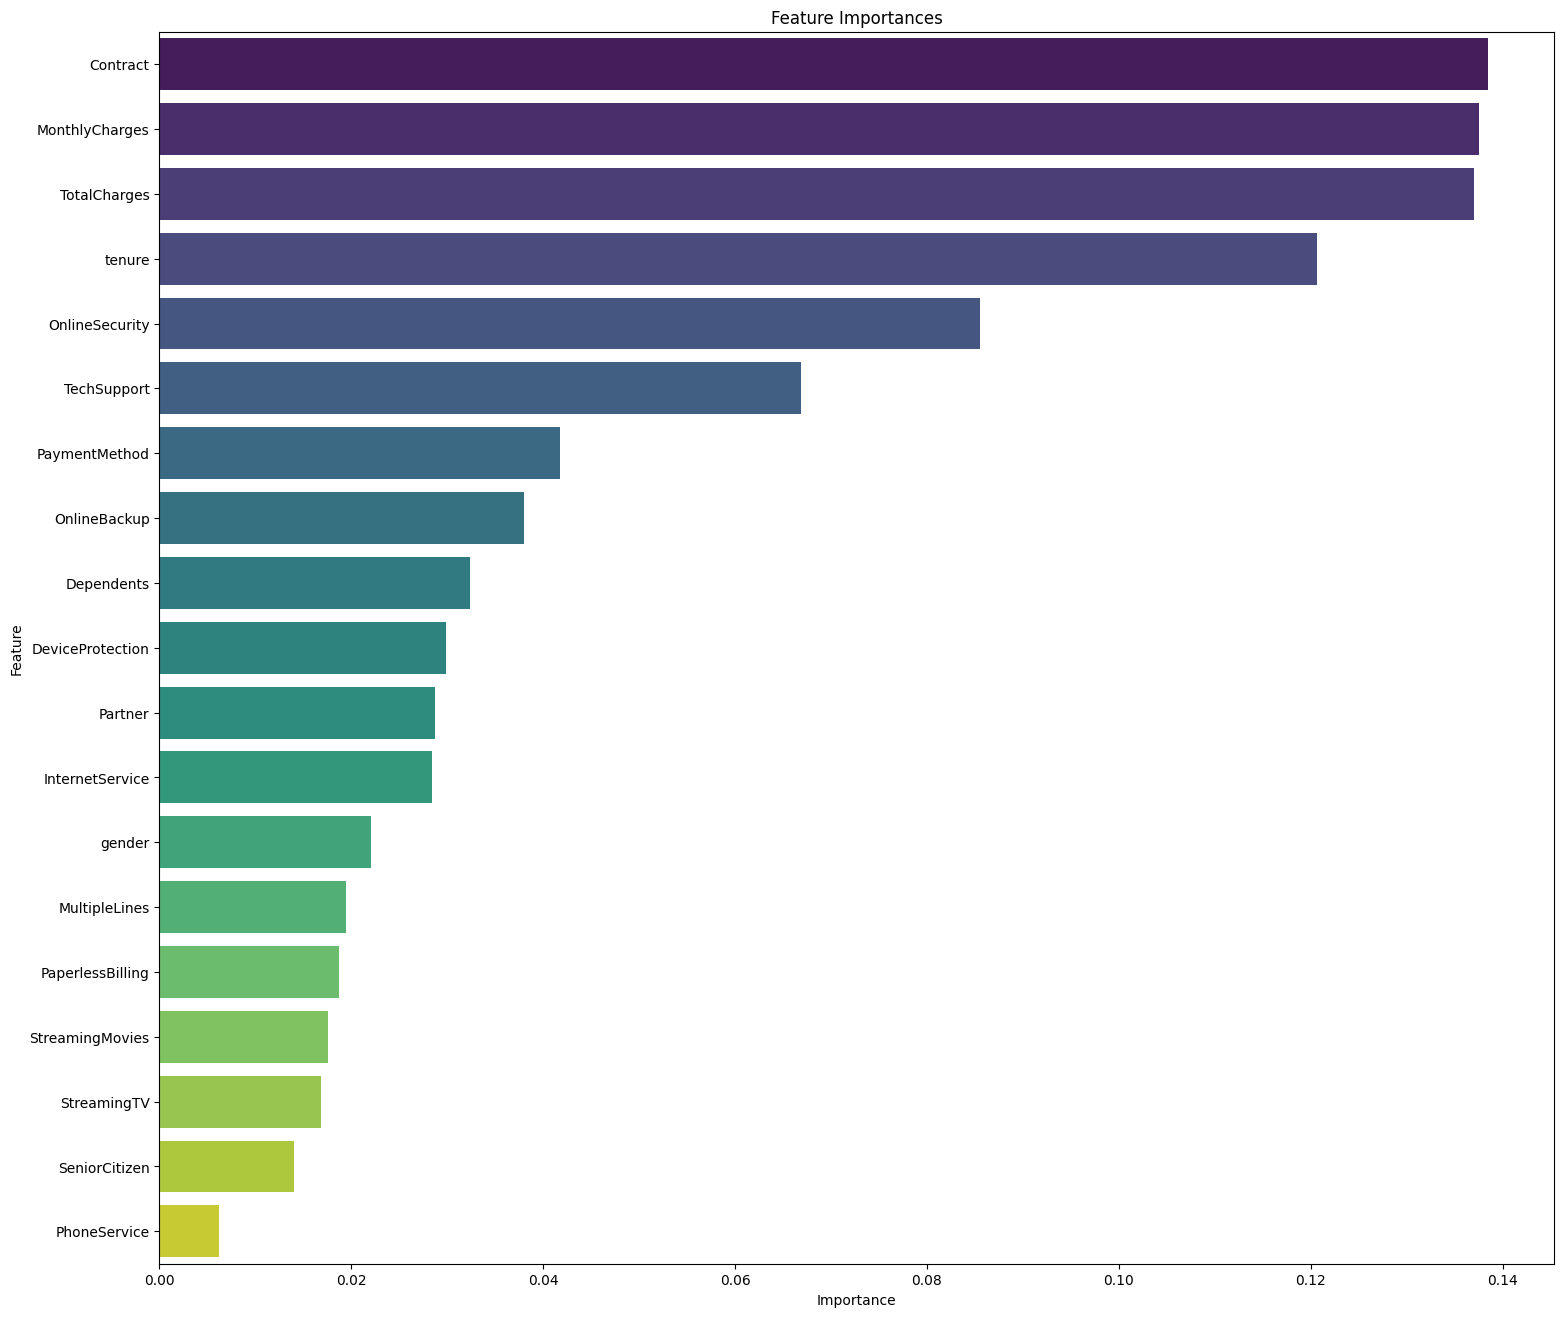

In [27]:
# Visualize feature importances
plt.figure(figsize=(18,16))
sns.barplot(x='importance', y='feature', data=importances_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [18]:
y_pred = best_clf.predict(X_test)
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7766209181258874
Precision: 0.5763293310463122
Recall: 0.5989304812834224
F1 Score: 0.5874125874125874
AUC-ROC Score: 0.8156102412848926

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1552
           1       0.58      0.60      0.59       561

    accuracy                           0.78      2113
   macro avg       0.71      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113


Confusion Matrix:
[[1305  247]
 [ 225  336]]


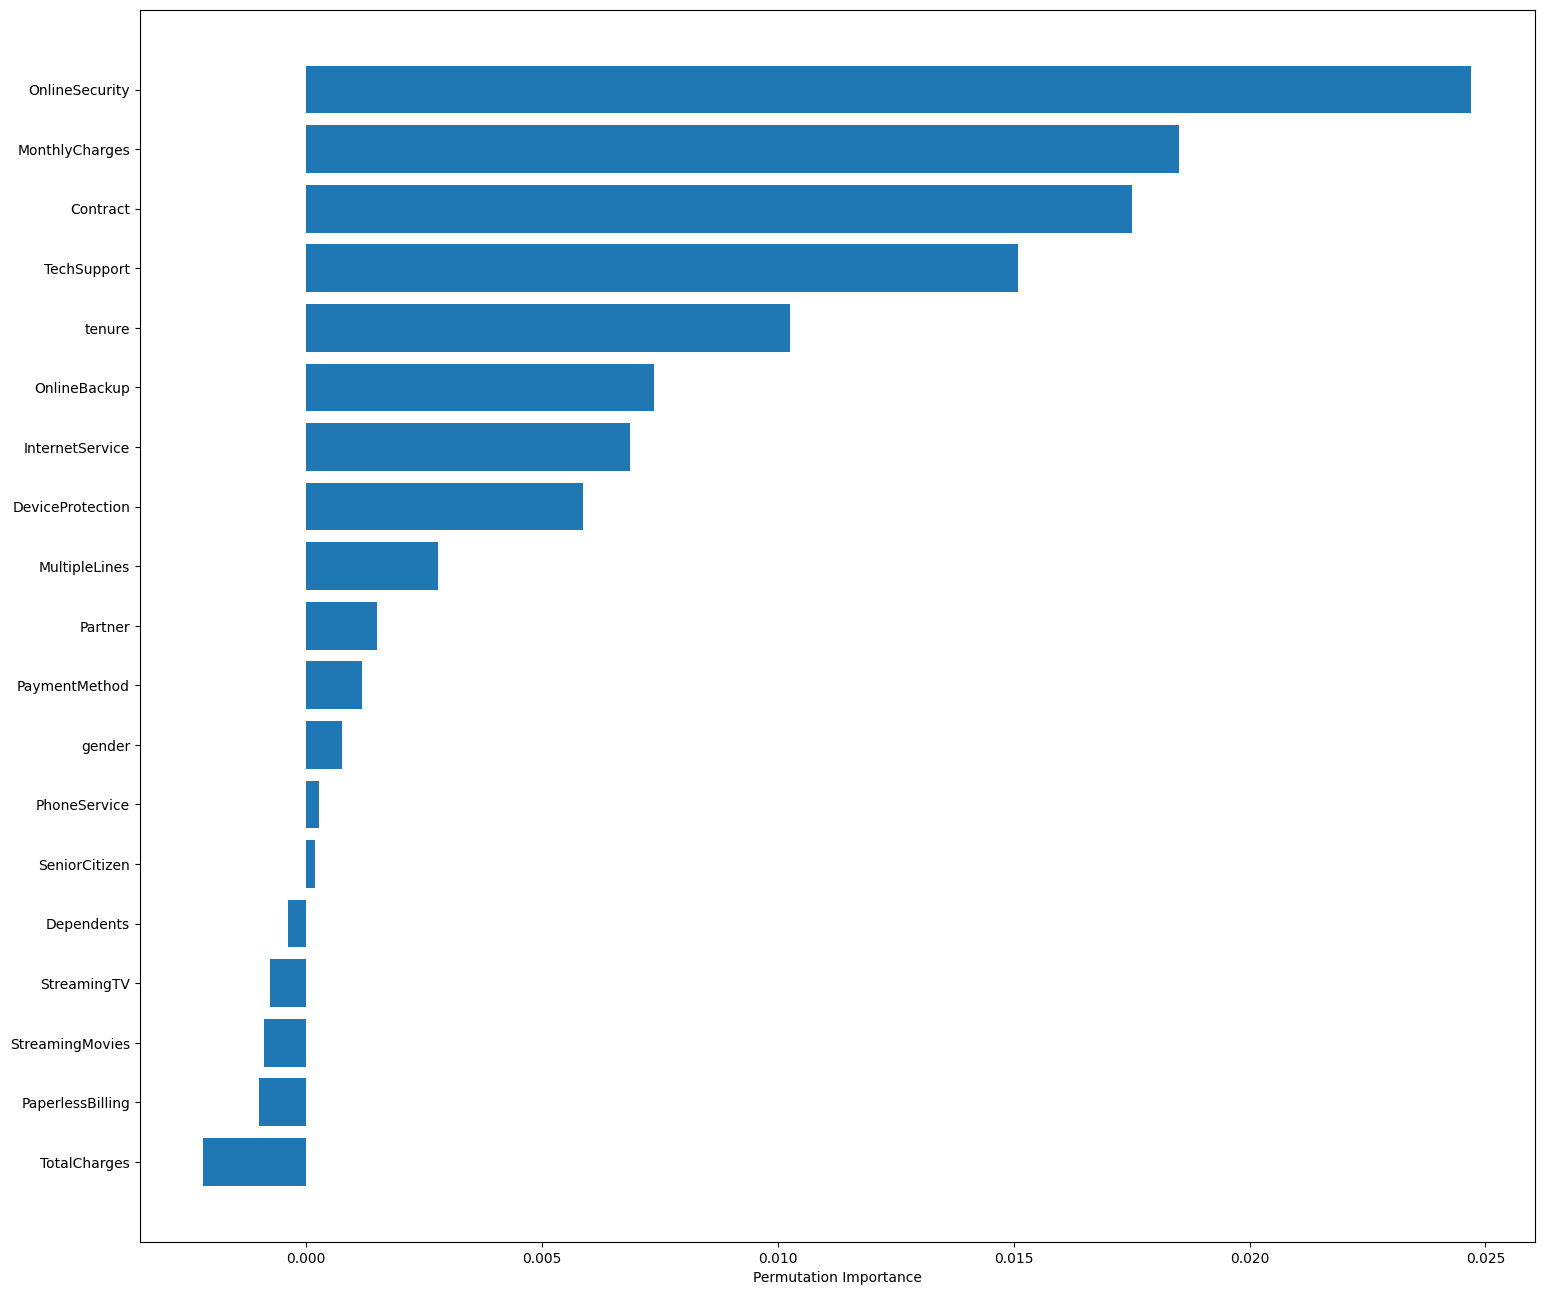

In [28]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    best_clf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(18, 16))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()